In [1]:
"""
OBJECTIVE: 

There were two main objectives for this project. One is to gain experience working with a real world data set. 
Secondly, I want to see how accurate a regression model will perform in predicting house price from my home state,
Washington. 

This was official my first Machine Learning project from start to finish. I attempted to answer most of the 
questions that I put in the README.md Machine Learning Project Checklist.

I have been studying Linear Regression in my Machine Learning coure and I wanted to go above and beyond of whats 
expected in the classrooom. My model will be used for learning purposes and to see how accurate I can predict 
house prices in King County, Washington.
 
"""

'\nOBJECTIVE: \n\nThere were two main objectives for this project. One is to gain experience working with a real world data set. \nSecondly, I want to see how accurate a regression model will perform in predicting house price from my home state,\nWashington. \n\nThis was official my first Machine Learning project from start to finish. I attempted to answer most of the \nquestions that I put in the README.md Machine Learning Project Checklist.\n\nI have been studying Linear Regression in my Machine Learning coure and I wanted to go above and beyond of whats \nexpected in the classrooom. My model will be used for learning purposes and to see how accurate I can predict \nhouse prices in King County, Washington.\n \n'

In [2]:
# Needed modules for DataFrame and computations
import pandas as pd
import numpy as np
import math

# Needed for plots
import matplotlib.pyplot as plt
import matplotlib as mpl


# Modules for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # to calculate r^2
from sklearn.preprocessing import MinMaxScaler  # To scale all input features that are continuous
from sklearn.preprocessing import StandardScaler # standardize continuous data

In [3]:
# Data was downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction
# File size is about 2.4 MB
# With 21613 unique data points
house_data = pd.read_csv('kc_house_data.csv')

In [4]:
# View the first few items
# Explore the data a bit
# 
house_data.head()  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# The length of the data set 
len(house_data)

21613

In [6]:
# Some descriptive stats to help in selecting features for the model
# The id may not be useful
# Lat and Long also may not be useful since I will be using zipcode.
# Water from is given as a rating between 0 and 1
# View has a rating between 0 and 4
# Condition has a rating between 0 and 5.
# Grade ha a max of 13 and min of 1
# Looks like the oldest house was built in 1900
# The data seems to be in decimal form
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# A quick description of the data. With this I can see how many attributes I will be working with.
# It also easily allows me to see if there are any null values. Which this dataset does not have any.
# Check to see if any of the data is an object, int, foat..
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

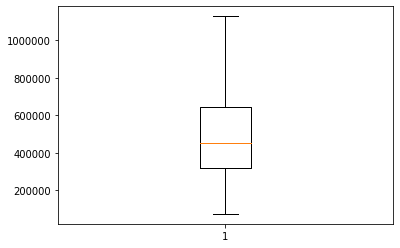

In [8]:
# It is a good idea to visualize the data before bulding the regression model.
# The graph below is a visualization of the price distribution. 
# It allows me to see the min, max, median inside the quartile range. 

plt.boxplot(house_data['price'], 0, '')
plt.show()

In [9]:
# Feature selection: 
# After looking over the attributes I decided to drop the following since I felt they will not help in 
# determining the price of the house.
# They are 'id' ,'date', ' lat', and 'long'
house_data = house_data.drop(['id', 'date', 'lat', 'long'], axis=1)

In [10]:
# house_data now contains the features that I will use in my model.
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108ba85d0>,
      dtype=object)

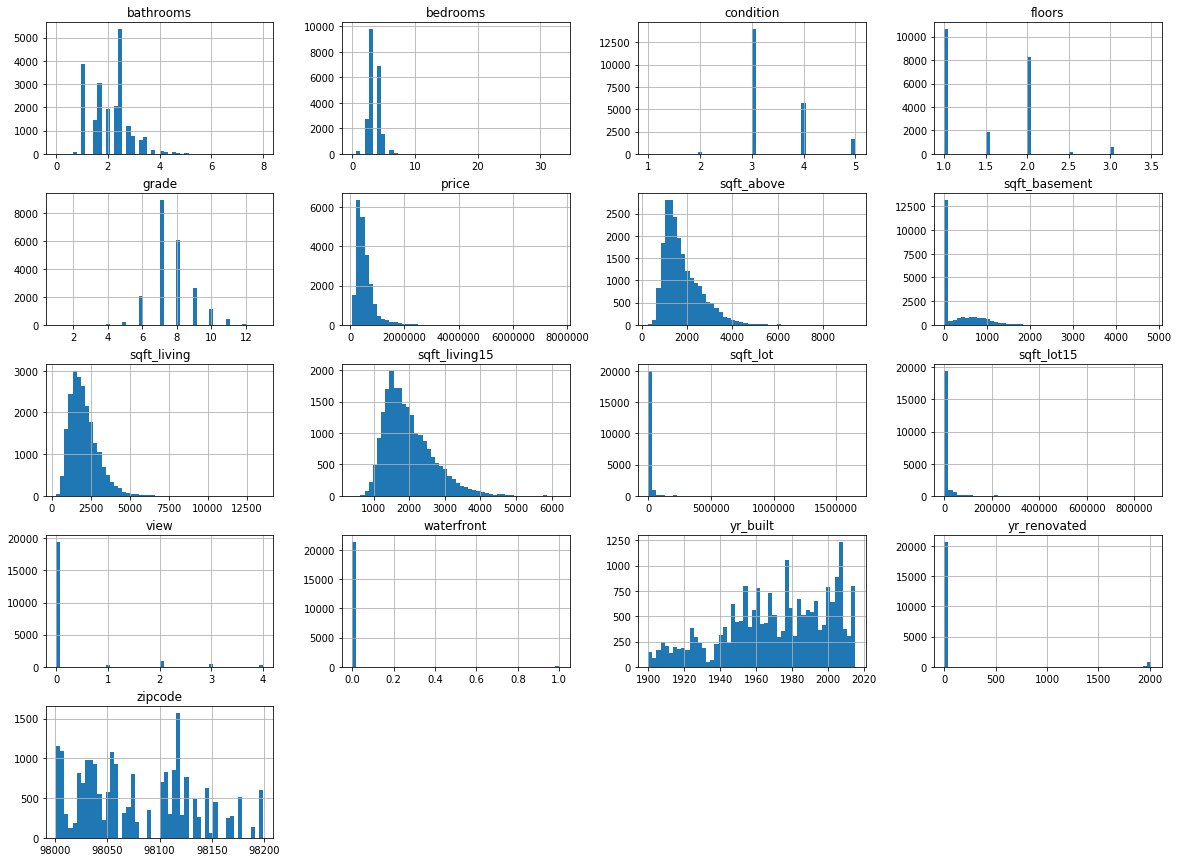

In [11]:
# The histogram plots for each feauture below show the number of instances that have a given value range
# From the graphs below I can see the some of the features are somewhat skewed towards the left.
# Price, sqft_above, sqft_living, sqft_living15
house_data.hist(bins=50,figsize=(20,15))

##### shuffle the DF. Frac generates a sample form the dataset. reset_index will contain 0-n
house_data = house_data.sample(frac = 1).reset_index(drop=True)
house_data.head()

In [12]:
# Shows the unique values in this column (feature) have a grade 1-13.
house_data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [13]:
# Sorting the yr_built feature can make it easy to visually see the min and max, like the descriptive statistics
# I used earlier. 
np.sort(house_data['yr_built'].unique())

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [14]:
# This is another way to look for any NaN values in each column. Which did not return any values, that's a good 
# thing.
house_data[house_data.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [15]:
# Since there are no nan values I can continue building my model.

# x is all the features but price
x = house_data.drop('price', axis=1)

# y is just the price
y = house_data['price']       

# The method below allows me to easily split the data and select a test_size and select if I want random selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# For now I am not going to transform any features and I am ready to set up the linear model
# I am not going to scale or encode any of the features. 
linear_model = LinearRegression()

# fit the model with the x_train and y_train sets
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# The model has been built, now how well does it perform?

# The value is not very good, with a score of 0.65
linear_model.score(x_train, y_train)

0.655261734823293

In [18]:
# I checked the coeficients of each input, which essentially are the best weights that the model found.
# Weights with a positive number (+) have a positive effect on price 
# Weights with a negative number (-) have a negative effect on price
linear_model.coef_

array([-3.77188861e+04,  4.39311106e+04,  1.11408441e+02,  2.75479809e-02,
        2.84316081e+04,  6.01636217e+05,  4.31701242e+04,  1.97147601e+04,
        1.17509004e+05,  5.29642583e+01,  5.84441827e+01, -3.54993953e+03,
        1.03230591e+01,  3.21610517e+01,  2.71099373e+01, -6.06470863e-01])

In [19]:
# I decided to create a small Pandas Series in which I used the feature names as index names and the 
# linear model's weights as the values to easily see the column names and its effect on price.
# Interestingly as the number of bedrooms increases the price seems to drop. 
# Waterfront, as expected has a huge positive effect on price. 
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coefficients)

bedrooms         -37718.886149
yr_built          -3549.939529
sqft_lot15           -0.606471
sqft_lot              0.027548
yr_renovated         10.323059
sqft_living15        27.109937
zipcode              32.161052
sqft_above           52.964258
sqft_basement        58.444183
sqft_living         111.408441
condition         19714.760098
floors            28431.608110
view              43170.124192
bathrooms         43931.110552
grade            117509.004040
waterfront       601636.217162
dtype: float64


In [20]:
# From the model above I will use x_test to predict the house prices.
y_pred = linear_model.predict(x_test)
y_pred

array([ 292872.42653307, 1494280.05821989,  505906.17226607, ...,
        288983.88024075,  230728.45204954,  377271.94732996])

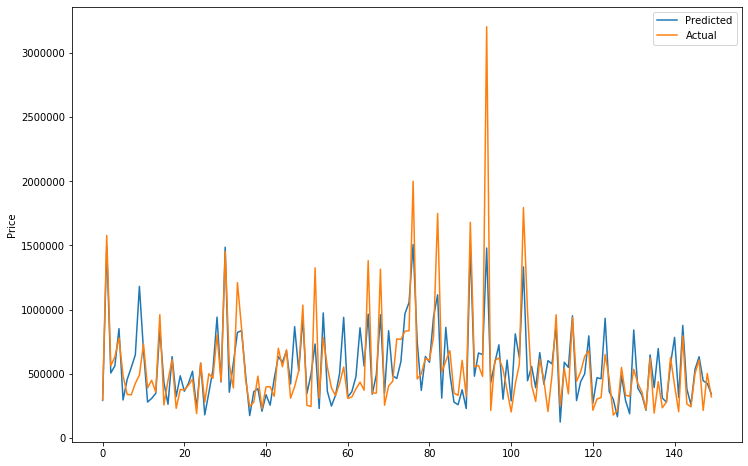

In [21]:
# The graph below is a plot of the Predicted prices and the actual prices.
# The graph confirms the earlier score of .65, which is not a very good model to predict prices. 
plt.figure(figsize=(12, 8))

plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
# Lets take a look at the r_square 
# Which confirms that the model does not fit very well with a .64 r squared value. 
# Its not a horrible value just not quite what I expected. 
r_square = linear_model.score(x_test, y_test)
r_square

0.6453631252431823

In [23]:
# Now I will see how far my values are from the model.
# I will take the squre root of this so that it is in the same scale as my data
model_mse = mean_squared_error(y_pred, y_test)
model_mse

42174931196.10166

In [24]:
# my values are seem to be above 200k from the model.
# When compared to the average price of the house above 500k. 
math.sqrt(model_mse)

205365.3602633649

In [25]:
# Since I have an idea where the model currently stands.
# Now I will try to improve on it by transforming the features. 
# First I am going to remove the zipcode as a feature and then add it later because I am going to 
# treat it as a categorical value
x = house_data.drop(['zipcode'], axis=1)
y = house_data[['bedrooms', 'condition', 'grade', 'zipcode']]

In [26]:
# I am going to scale the included features using the minMaxScaler. I left of waterfront and view because I 
# will treat these as categorical features. 
x_continuous = house_data[['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']]

In [27]:
# This DataFrame contains the two categorical columns
# waterfront and view
x_categorical = house_data[['waterfront', 'view']]

In [28]:
# I also treated zipcode as a categorical value because I can't compare them like other numbers. I can't say
# this zipcode is more or less than anothe zipcode.

# I will use onehot encoding
x_zipcode = pd.get_dummies(house_data['zipcode'], columns = ['zipcode'])
x_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Set up the scaler for the continuous data in the range from 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [32]:
# Scale the continuous values stored in x_continuous
# this will be a numpy array so I will need to create a DataFrame
scaled_x = scaler.fit_transform(x_continuous)

In [33]:
# The following are the column names for the DataFrame that will store the scaled values.
columns = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']

In [34]:
# The DataFrame using the scaled_x data and the column names as used in the x_continuous variable
scaled_df = pd.DataFrame(data=scaled_x, columns = columns)

In [35]:
# As can be seen the data is now scaled between 0 and 1 for all of the continuous values.
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.12500,0.067170,0.003108,0.0,0.097588,0.000000,0.478261,0.000000,0.161934,0.005742,0.090909,0.5,0.500000
1,0.28125,0.172075,0.004072,0.4,0.206140,0.082988,0.443478,0.988089,0.222165,0.008027,0.090909,0.5,0.500000
2,0.12500,0.036226,0.005743,0.0,0.052632,0.000000,0.286957,0.000000,0.399415,0.008513,0.060606,0.5,0.416667
3,0.37500,0.126038,0.002714,0.0,0.083333,0.188797,0.565217,0.000000,0.165376,0.004996,0.121212,1.0,0.500000
4,0.25000,0.104906,0.004579,0.0,0.152412,0.000000,0.756522,0.000000,0.241094,0.007871,0.090909,0.5,0.583333


In [36]:
# Now I will concatenate or add to the scaled data the x_categorical and the x_zipcode where I used onehot 
# encoding.
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [37]:
# View the first few rows of the scaled data, onehot encoding of zipcodes and the categorical data. 
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.12500,0.067170,0.003108,0.0,0.097588,0.000000,0.478261,0.000000,0.161934,0.005742,...,0,0,0,0,0,0,1,0,0,0
1,0.28125,0.172075,0.004072,0.4,0.206140,0.082988,0.443478,0.988089,0.222165,0.008027,...,0,0,0,0,0,0,0,0,0,0
2,0.12500,0.036226,0.005743,0.0,0.052632,0.000000,0.286957,0.000000,0.399415,0.008513,...,0,0,0,0,0,0,0,0,0,0
3,0.37500,0.126038,0.002714,0.0,0.083333,0.188797,0.565217,0.000000,0.165376,0.004996,...,0,0,0,0,0,0,0,0,0,0
4,0.25000,0.104906,0.004579,0.0,0.152412,0.000000,0.756522,0.000000,0.241094,0.007871,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# x is now my new scaled DataFram
x = scaled_df 

# y remains the same my prices
y = house_data['price']

# split the data using the same techniques as above
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
# Rebuild Linear model with x and y parameters
# This time I will set fit_intercept to False because I am working with onehot encoding data, the zipcodes
# Becuase if the model tries to fit the intercept it could to problems related to colinearity, so set the 
# value to false to avoid problems.
# if LRM tries to fit data we will avoid co-linearity problems due to onehot
linear_model = LinearRegression(fit_intercept=False) 
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [40]:
linear_model.score(x_train, y_train)

0.8071659871072185

In [41]:
# The r square value is much better than before, 0.65. 
# Clearly scalling and encoding the data has improved the model by a considerable amount

In [42]:
# Taking a look at the coef_ of the LM I can see that it is much larger and this is due to the onehot encoding 
# of the zipcodes. 
linear_model.coef_

array([ 1.70631822e+05, -1.41182165e+18,  4.35843176e+05, -1.12950930e+05,
        9.71759508e+17,  5.13583424e+17, -8.15080026e+04,  3.54291466e+04,
        5.76241020e+04, -1.73576000e+05, -8.77952000e+05,  1.01888000e+05,
        6.74304000e+05,  6.80368000e+05,  5.48480000e+04, -3.61474000e+05,
       -3.40096000e+05, -3.74990000e+05,  4.08320000e+05, -5.93280000e+04,
       -1.08992000e+05, -1.22816000e+05, -1.10608000e+05, -2.94632000e+05,
       -2.50688000e+05, -2.50788000e+05, -2.80020000e+05, -3.75936000e+05,
       -3.99152000e+05, -2.09128000e+05, -1.98656000e+05, -2.44464000e+05,
       -1.52016000e+05, -3.56236000e+05, -3.52532000e+05, -3.50488000e+05,
       -4.13600000e+03, -1.59664000e+05, -3.34016000e+05,  9.18560000e+05,
        1.49184000e+05, -3.56608000e+05, -2.73774000e+05, -1.34688000e+05,
       -1.70256000e+05, -3.12256000e+05, -2.64688000e+05, -3.33712000e+05,
       -2.82800000e+05, -2.81736000e+05, -3.91096000e+05, -2.12736000e+05,
       -1.92960000e+05, -

In [43]:
# There are more coefficients this time
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()

In [44]:
# Once again I can see that the number of bedrooms negatively impacts the price.
# Now I can compare zipcodes and see which ones drive the price of the house down.
# zipcode 98023 is near the Tacoma airport so it makes sense that the prices will be lower
# zipcode 98039 is very high as it is near the waterfront in downtown Seattle. 
print(coefficients)

sqft_living     -1.411822e+18
bedrooms        -8.779520e+05
98023           -3.991520e+05
98092           -3.990720e+05
98070           -3.910960e+05
                     ...     
grade            6.743040e+05
waterfront       6.803680e+05
98039            9.185600e+05
sqft_basement    5.135834e+17
sqft_above       9.717595e+17
Length: 85, dtype: float64


In [45]:
# Now I predicted prices using x_test and compare the values with the actual values
y_pred = linear_model.predict(x_test)

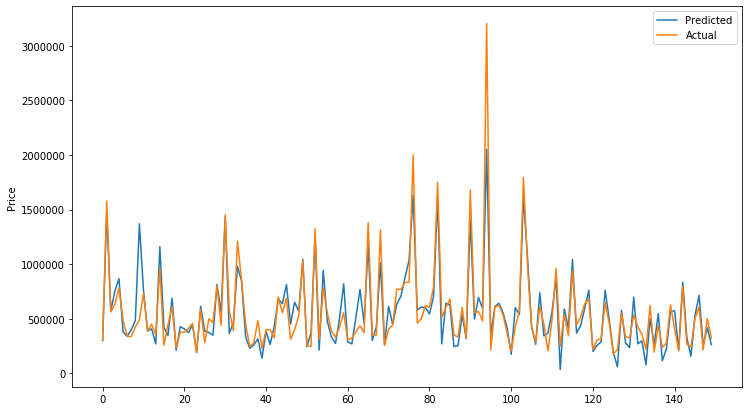

In [46]:
# Below is the graph of 150 values to compare the Predicted with actual prices. If I compare this with my earlier
# model I can see that the new prdictions are much closer than before. 
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
# The r square value is at .81 which is much high than 0.64 from earlier. So, onehot encoding and scaling the data
# improved the model by a significant amount
r_square = linear_model.score(x_test, y_test)
r_square

0.8108556947722433

In [48]:
# I will use RMSE to see how far my values are from the model.
model_mse = mean_squared_error(y_pred, y_test)
model_mse

22493848290.833275

In [49]:
# The values are much better the the 200k I got earlier from the old model. I can conclude that preprocessing 
# should be done before running a machine learning model.
math.sqrt(model_mse)

149979.49290097388

In [50]:
# Lessons learned:
# Its important to preprocess the features before building the machine learning estimator to give better results. 

In [51]:
# Now I will use a Standard scalar for the continuous data to see if it improves the model.
# Set up the standard scalaer
# Standard scaler operates on each of the feautes individually and it will make sure that 
# each feature has a zero mean and STD = 1
scaler = StandardScaler()

In [52]:
# view the parameters of the scaler
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
scaler.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [54]:
# Using the StandardScaler on the x_continuous variable I created earlier
scaled_x = scaler.fit_transform(x_continuous) # The scaled values are an np array

In [55]:
# Create the DataFrame like before using the scaled data and the column names 
scaled_df = pd.DataFrame(data=scaled_x, columns=columns)

In [56]:
# A view of the first few rows
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715,-0.398737,-0.629187,-0.558836
1,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868,-0.398737,-0.629187,-0.558836
2,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375,-1.473959,-0.629187,-1.409587
3,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522,0.676485,2.444294,-0.558836
4,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849,-0.398737,-0.629187,0.291916


In [57]:
# Concatenate the scaled DataFrame the x_categorical and x_zipcode with onehot encoding.
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [58]:
# view the first few rows of the new DataFrame
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715,...,0,0,0,0,0,0,1,0,0,0
1,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868,...,0,0,0,0,0,0,0,0,0,0
2,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375,...,0,0,0,0,0,0,0,0,0,0
3,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522,...,0,0,0,0,0,0,0,0,0,0
4,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Again x is the new scaled DataFrame
x = scaled_df

# y remains the price of the hosuse
y = house_data['price']

# split the data as before with 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
# Redifine the Linear Regression model
# As before set fit_intercept = False
linear_model = LinearRegression(fit_intercept=False)
# fit the model using x_train and y_train
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [61]:
# This values is almost the same as the minMaxScalar. As a result the new model does not seem to have a major
# impact on the training data.
linear_model.score(x_train, y_train)

0.8071614709664229

In [62]:
# r square value is very similar as before. So there doesn't seem to be a significant impact from using 
# standard scaler as apposed to minMaxscaler
# as ap
r_square = linear_model.score(x_test, y_test)
r_square

0.810899969875961

In [63]:
# Now i predicted the values using x_test and plotted the results against the actual prices. 
y_pred = linear_model.predict(x_test)

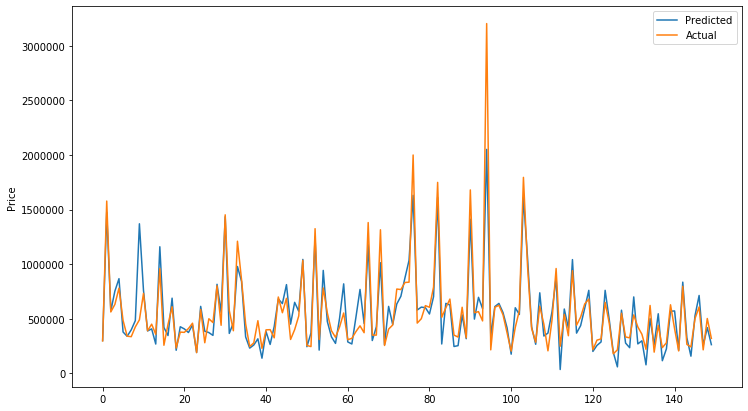

In [64]:
# The graph looks very similar as the minMaxScaler and can't really tell the difference.
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

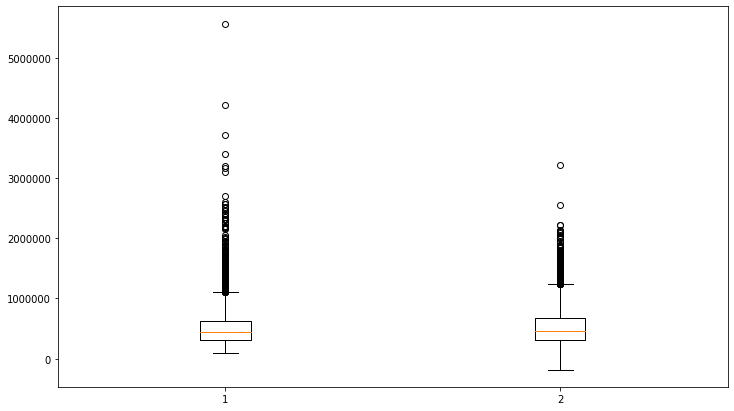

In [65]:
# Box plot of price destributions using y_test and y_pred
# The boxes seem to be very similar. Where they differ is in the case of the outliers. The outliers are 
# represented by the little black circles, which are not part of the box or the whiskers that extend from the box.
# These are prices that really stand out in the distribution. What the box plot also tells me is that my Linear 
# Model has not been able to accurately predict the price for the very expensive homes. It is very difficult to 
# predict outliers as they can be considered noise. 
plt.figure(figsize=(12,7))
plt.boxplot([y_test, y_pred])
plt.show()

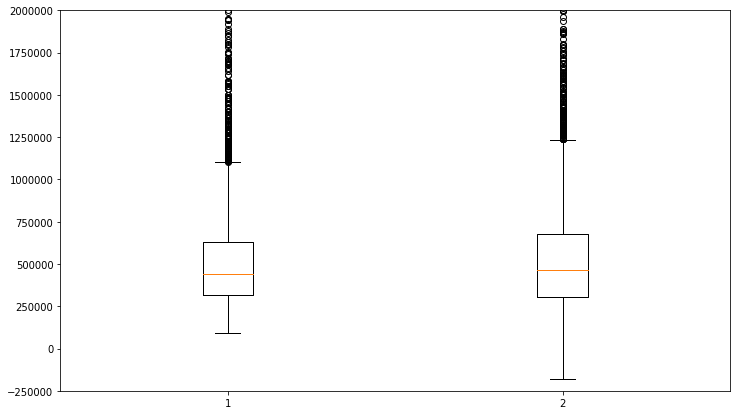

In [66]:
# It is dificult to predict outliers in any field
# Now I will zoom in on the box plot to focus on the box rather than the outliers. 
# I can see that some of the predictions were in fact negative. However, the distribution of the predictions 
# very closely resembles the actual distribution of the house prices, and all of this is a confirmation of the 
# reasonably high r_square and low mean-square error values.
plt.figure(figsize=(12,7))
plt.ylim(bottom = -250000, top = 2000000)
plt.boxplot([y_test, y_pred])
plt.show()

In [67]:
# Standard characteristics of the StandardScalers
# values will have a zero mean and a variance and std of 1.
# Z-score

In [ ]:
# Recall two matrics that were used to evaluate regression model
# Mean Squared Error RMSE - most widely used, the lower the better

# r_squared score -- the higher the better. If more features are added the r_square may increase even if the 
# new features dont improve the model. In this case use adjusted r^2, calculates the score by taking into account
# the number of features. 
# r^2 measures how well the linear model captures the variance in the data

# Mean Absolute error

In [ ]:
# Details conveyed in a Boxplot
# Lower edge: 1st quartile at 25% 
# upper edge: 3td quartile at 75%
# horizontal line: median vale for distribution
# whiskers: IQR: 3Q + 1.5IQR. 
#                1Q - 1.5IQR
# Outliers